In [ ]:
# run in terminal for rf or lr api model
# uvicorn api_rf_and_lr:app --host 0.0.0.0 --port 8084 --reload

In [15]:
%pip install mathplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for mathplotlib


## Random Forest and Logistic Regression 

In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np

response = requests.post(
    "http://127.0.0.1:8084/predict_v2",
    json={
        "pitch_entropy": 2.1,
        "IP_per_G": 6.5,
        "Pitches_per_IP": 15.5,
        "FBv": 94.2,
        "avg_pitch_velocity": 85.1,
        "IP": 110.0,
        "model_choice": 0, # 1 for rf, 0 for lr
    }
)

print(response.json())

{'Model': 'Logistic Regression', 'Injury Risk Probability': 0.663, 'Predicted Class': 1, 'Threshold': 0.55}


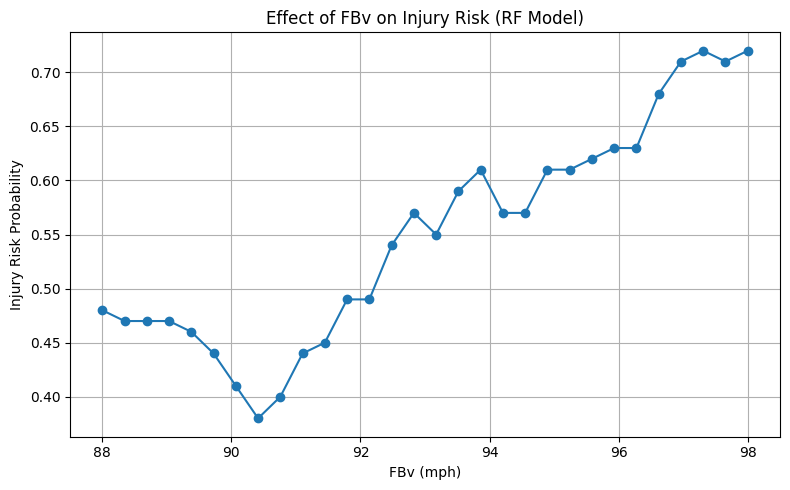

In [3]:

import requests
import numpy as np
import matplotlib.pyplot as plt

base_data = {
    "pitch_entropy": 1.5,
    "IP_per_G": 5.8,
    "Pitches_per_IP": 15.2,
    "avg_pitch_velocity": 85.0,
    "IP": 100.0,
    "model_choice": 1  # RF = 1, LR = 0
}

fbv_values = np.linspace(88, 98, 30)
probabilities = []

for fbv in fbv_values:
    data = base_data.copy()
    data["FBv"] = float(fbv)
    
    try:
        response = requests.post("http://127.0.0.1:8084/predict_v2", json=data)
        prob = response.json().get("Injury Risk Probability", None)
        probabilities.append(prob if prob is not None else np.nan)
    except Exception as e:
        print(f"Error on FBv={fbv:.2f}: {e}")
        probabilities.append(np.nan)

plt.figure(figsize=(8, 5))
plt.plot(fbv_values, probabilities, marker='o')
plt.title("Effect of FBv on Injury Risk (RF Model)")
plt.xlabel("FBv (mph)")
plt.ylabel("Injury Risk Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


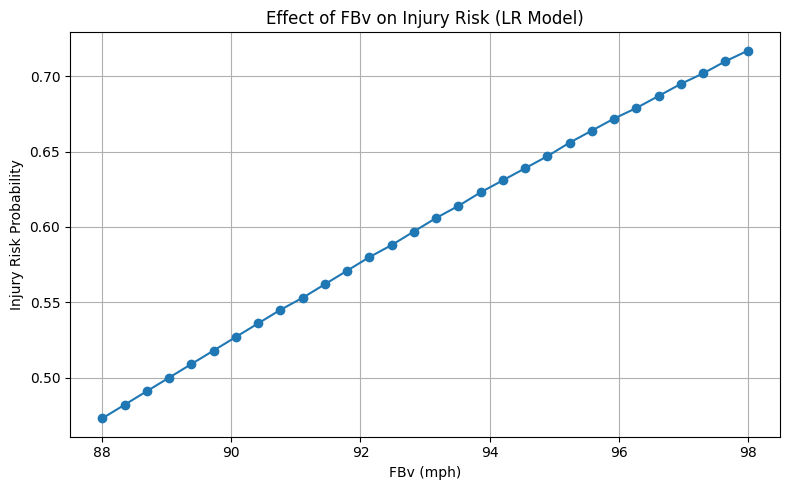

In [5]:
base_data = {
    "pitch_entropy": 1.5,
    "IP_per_G": 5.8,
    "Pitches_per_IP": 15.2,
    "avg_pitch_velocity": 85.0,
    "IP": 100.0,
    "model_choice": 0  # RF = 1, LR = 0
}

fbv_values = np.linspace(88, 98, 30)
probabilities = []

for fbv in fbv_values:
    data = base_data.copy()
    data["FBv"] = float(fbv)
    
    try:
        response = requests.post("http://127.0.0.1:8084/predict_v2", json=data)
        prob = response.json().get("Injury Risk Probability", None)
        probabilities.append(prob if prob is not None else np.nan)
    except Exception as e:
        print(f"Error on FBv={fbv:.2f}: {e}")
        probabilities.append(np.nan)

plt.figure(figsize=(8, 5))
plt.plot(fbv_values, probabilities, marker='o')
plt.title("Effect of FBv on Injury Risk (LR Model)")
plt.xlabel("FBv (mph)")
plt.ylabel("Injury Risk Probability")
plt.grid(True)
plt.tight_layout()
plt.show()
